In [1]:
import os

key_api = os.getenv("BINANCE_KEY")
secret_api = os.getenv("BINANCE_PASS")

from binance.client import Client
client = Client(key_api, secret_api)

In [10]:
import pandas as pd
import numpy as np

def get_data(symbol, start):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1h', start))
    frame = frame.iloc[:,:6]
    frame.columns = ["Time", "Open", "High", "Low", "Close", "Volume"]
    frame.set_index("Time", inplace=True)
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    frame['ret'] = frame.Close.pct_change()
    frame['Price'] = frame.Open.shift(-1)
    return frame


In [11]:
df = get_data("BTCUSDT", "2023-01-01")
df.head()

,Open,High,Low,Close,Volume,ret,Price
Time,,,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570,NaN,16529.59
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669,0.001319,16551.47
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,-0.000198,16548.19
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,-0.000916,16533.04
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,-0.000677,16522.22


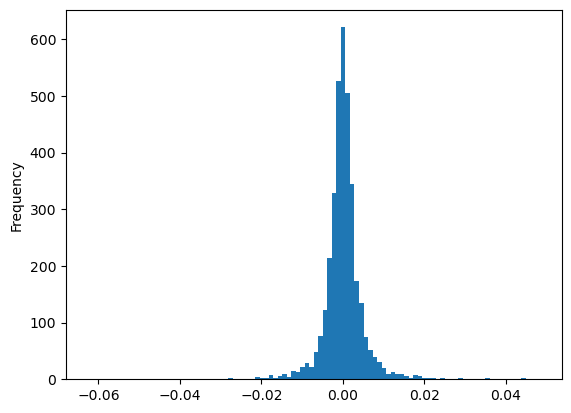

In [12]:
import matplotlib.pyplot as plt

df.ret.plot(kind='hist', bins = 100)
plt.show()

In [44]:
in_position = False
profits = []
for index, row in df.iterrows():
    if not in_position:
        if row.ret > 0.01:
            buyprice = row.Price
            bought_at = index
            tp = buyprice * 1.02
            sl = buyprice * 0.98
            in_position = True
    if in_position and index > bought_at:
        if row.High > tp:
            profit = (tp - buyprice)/buyprice # - 0.0015 #only for assets different than BTC
            profits.append(profit)
            in_position = False
        if row.Low < sl:
            profit = (sl - buyprice)/buyprice # 0.0015 #only for assets different than BTC
            profits.append(profit)
            in_position = False



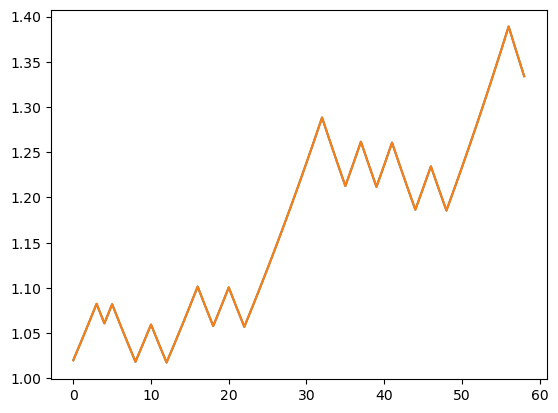

In [47]:
(pd.Series(profits) + 1).cumprod().plot()
plt.show()